In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

In [13]:
# loading data
df = pd.read_csv('data/updated/sales_train.csv')
df_items = pd.read_csv('data/items.csv')
df_shops = pd.read_csv('data/shops.csv')
df_categories = pd.read_csv('data/item_categories.csv')

In [18]:
df_no_refunds = df[df['refund'] == 'no']
df_refunds = df[df['refund'] == 'yes']
df_joined = pd.merge(
                pd.merge(
                    pd.merge(
                        df_no_refunds, df_items, on='item_id'),
                        df_categories, on='item_category_id'),
                        df_shops, on='shop_id')
df_joined_no_refunds = df_joined[df_joined['refund'] == 'no']

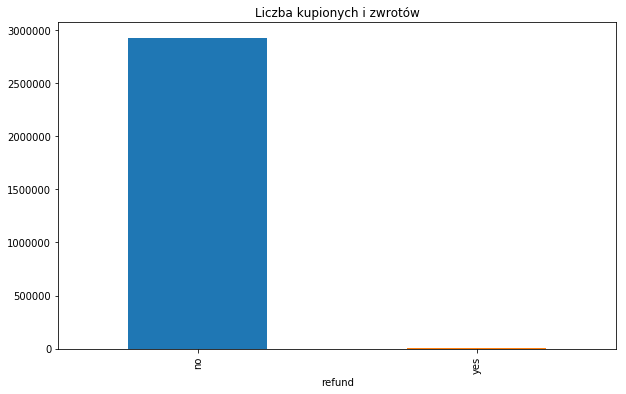

In [8]:
df.groupby('refund').size().plot(kind='bar', title='Liczba kupionych i zwrotów')

shop_name                        Москва ТРК "Атриум"  \
shop_name                                              
Москва ТРК "Атриум"                         1.000000   
Москва ТЦ "МЕГА Теплый Стан" II             0.663823   
Москва ТЦ "Семеновский"                     0.841378   
СПб ТК "Невский Центр"                      0.670553   

shop_name                        Москва ТЦ "МЕГА Теплый Стан" II  \
shop_name                                                          
Москва ТРК "Атриум"                                     0.663823   
Москва ТЦ "МЕГА Теплый Стан" II                         1.000000   
Москва ТЦ "Семеновский"                                 0.667807   
СПб ТК "Невский Центр"                                  0.450223   

shop_name                        Москва ТЦ "Семеновский"  \
shop_name                                                  
Москва ТРК "Атриум"                             0.841378   
Москва ТЦ "МЕГА Теплый Стан" II                 0.667807   
Москва ТЦ "Сем

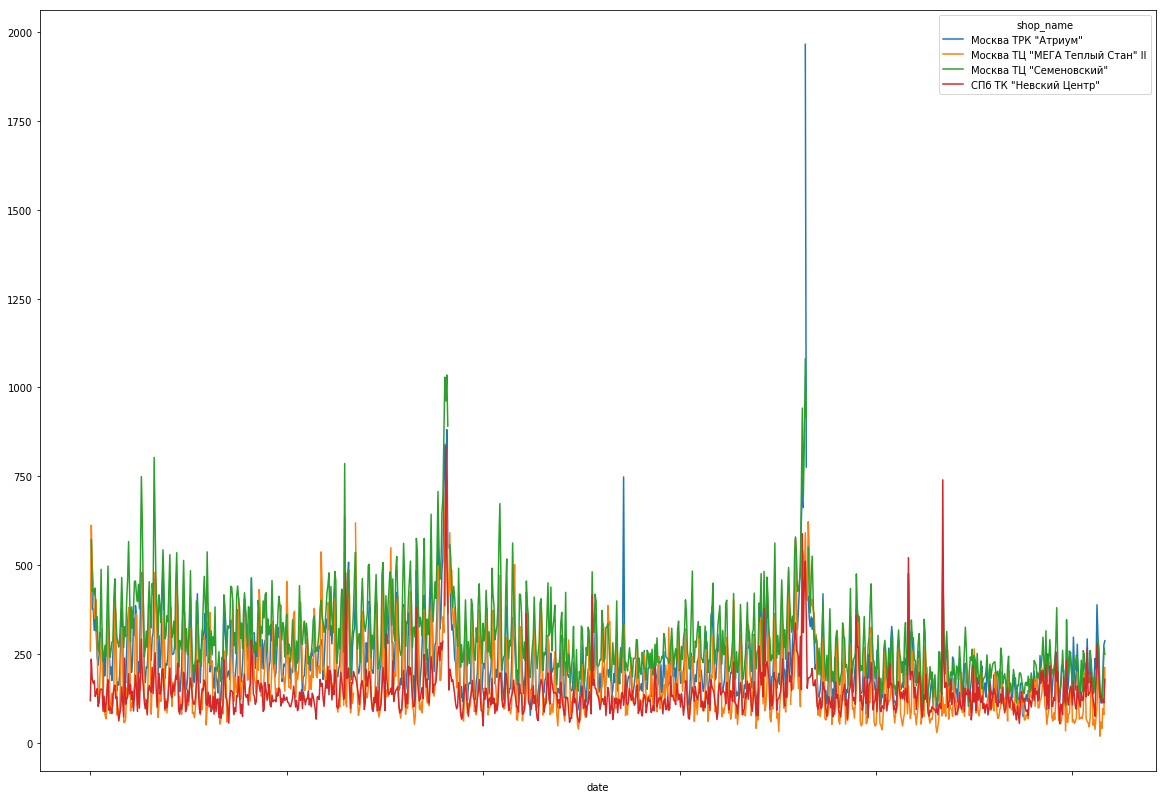

In [17]:
# 2. top/bot sklepy według przychodów i wykres ze sprzedażą na przestrzenii czasu + korelacja
def get_shop_names(data, n):
    transactions_per_shop = (data
                             .groupby('shop_name')['transaction_value']
                             .sum()
                             .to_frame()
                             .sort_values(by='transaction_value', ascending=False)
                             .reset_index())
    
    return transactions_per_shop['shop_name'].iloc[:n].tolist(), transactions_per_shop['shop_name'].iloc[-n:].tolist()

def plot_history_and_correlation(selected_shops, data):
    shop_history = (data[data['shop_name'].isin(selected_shops)]
                        .groupby(['shop_name', 'date'])
                        .sum()['item_cnt_day']
                        .to_frame()
                        .reset_index()
                        .pivot('date', 'shop_name', 'item_cnt_day'))
                    
    shop_history.plot(figsize=(20,14))
#     print(shop_history.corr())
    
top_income_shops, bottom_income_shops = get_shop_names(df_joined_no_refunds, 4)
plot_history_and_correlation(top_income_shops, df_joined_no_refunds)


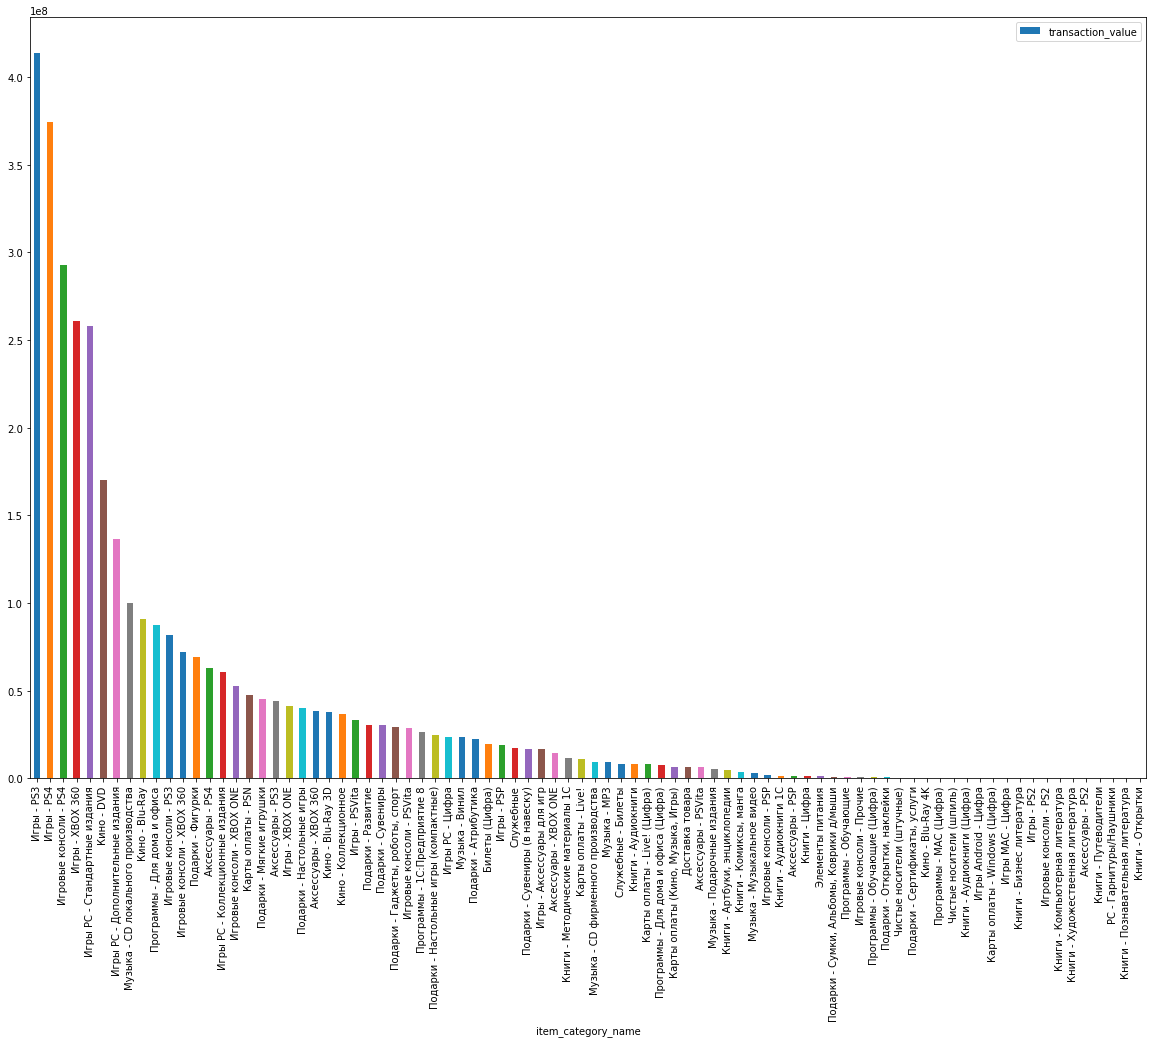

In [20]:
(df_joined
    .groupby('item_category_name')
    .sum()['transaction_value']
    .to_frame()
    .sort_values(by='transaction_value', ascending=False)
    .reset_index()
    .plot
    .bar(x='item_category_name', y='transaction_value', figsize=(20,14)))

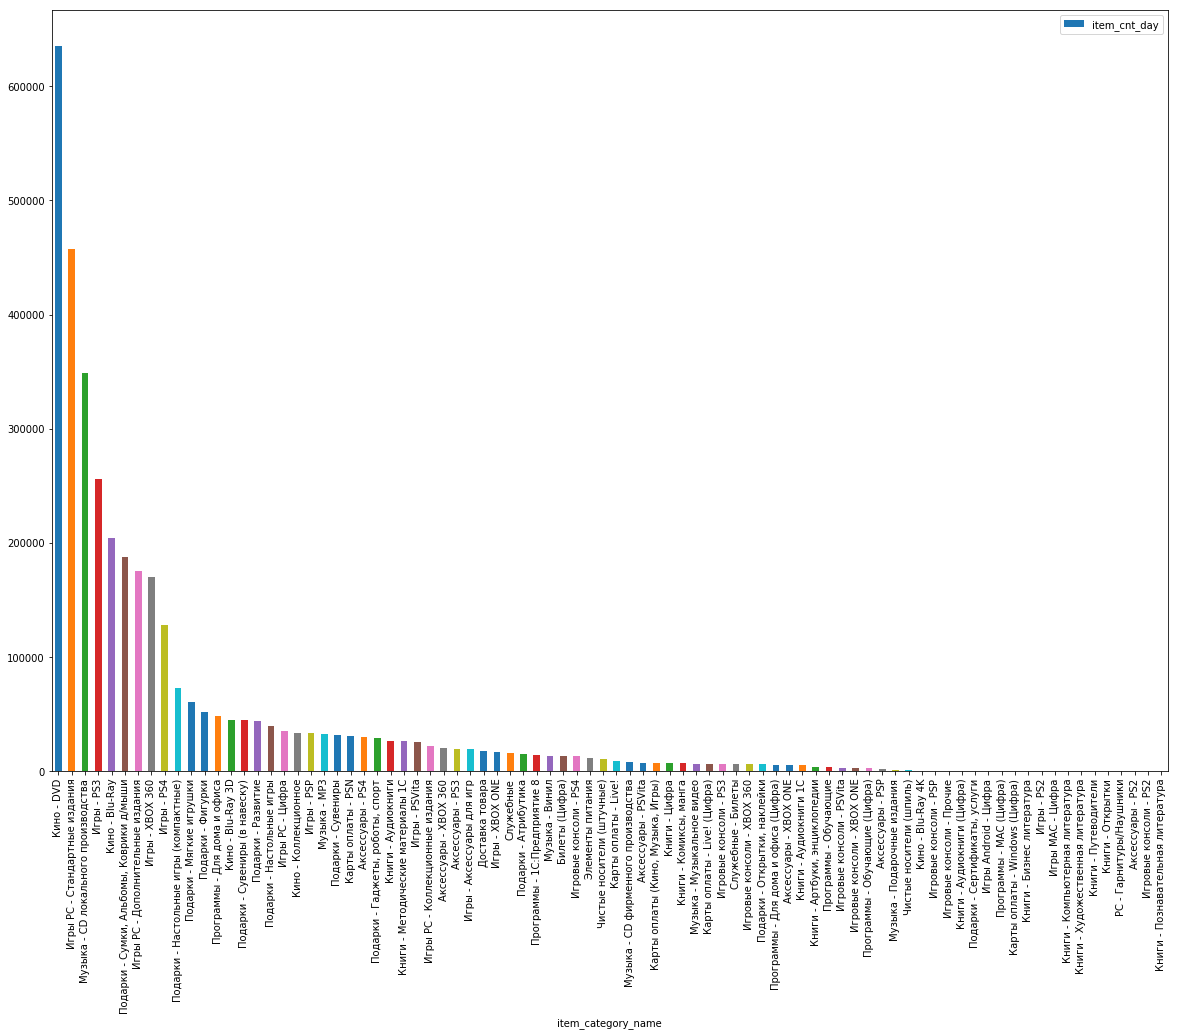

In [21]:
(df_joined
 .groupby('item_category_name')
 .sum()['item_cnt_day']
 .to_frame()
 .sort_values(by='item_cnt_day', ascending=False)
 .reset_index()
 .plot
 .bar(x='item_category_name', y='item_cnt_day', figsize=(20,14)))

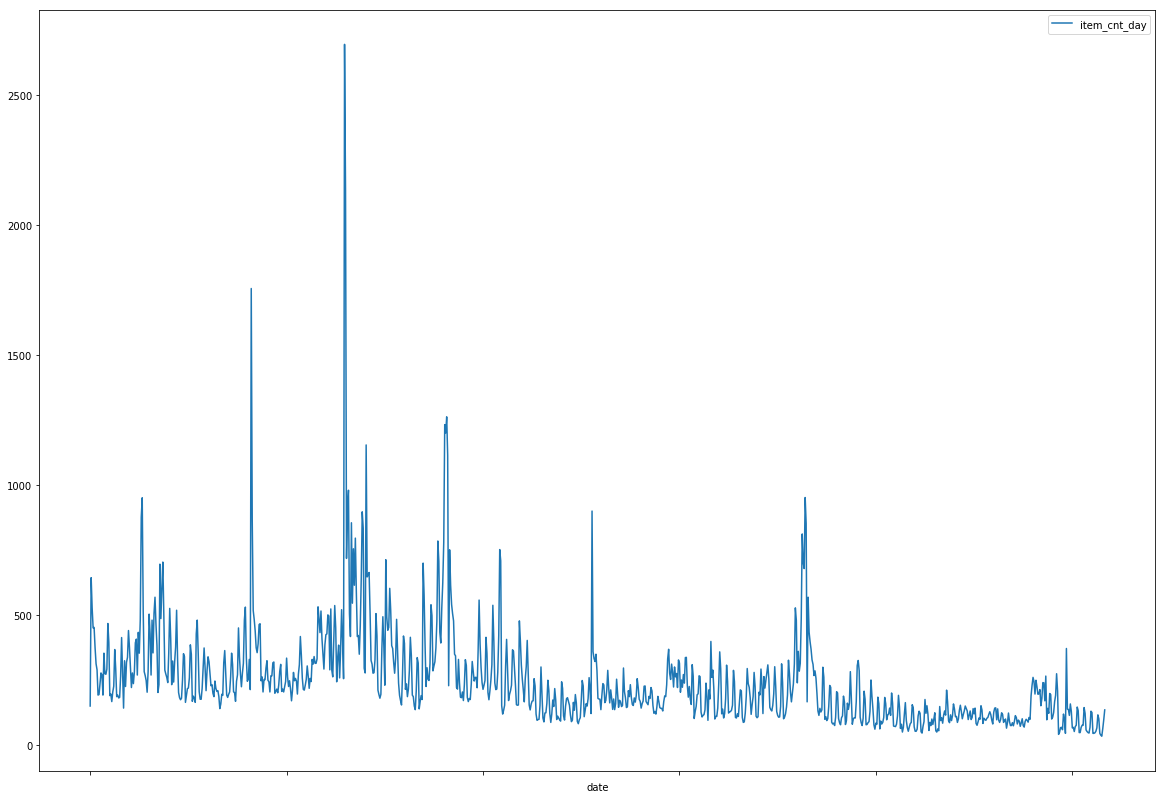

In [27]:
def most_profitable_category_plot():
    highest_income_category_id = (df_joined
                                     .groupby('item_category_id')
                                     .sum()['transaction_value']
                                     .to_frame()
                                     .sort_values(by='transaction_value', ascending=False)
                                     .reset_index()
                                     .iloc[0, 0])

    df_joined[df_joined['item_category_id'] == highest_income_category_id].groupby('date').sum()['item_cnt_day'].to_frame().plot(figsize=(20,14))

most_profitable_category_plot()